In [6]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

ff1.plotting.setup_mpl(misc_mpl_mods=False)

In [7]:
session = ff1.get_session(2023, 14, 'Q')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\sk\AppData\Local\Temp\fastf1.
	Size: 87.97 MB
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [8]:
d1 = "VER"
d2 = "SAI"

# accessing laps
d1Laps = session.laps.pick_driver(d1)
d2Laps = session.laps.pick_driver(d2)

# getting fastest laps
d1FastLap = d1Laps.pick_fastest()
d2FastLap = d2Laps.pick_fastest()

# get telemetry and add distance
d1Tel = d1FastLap.get_telemetry()
d2Tel = d2FastLap.get_telemetry()

# get team for colours
d1Team = d1FastLap["Team"]
d2Team = d2FastLap["Team"]

d1Color = ff1.plotting.team_color(d1Team)
d2Color = ff1.plotting.team_color(d2Team)

C:\Users\sk\Documents\src\formula1_python\venv\Lib\site-packages\fastf1\utils.py:81: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


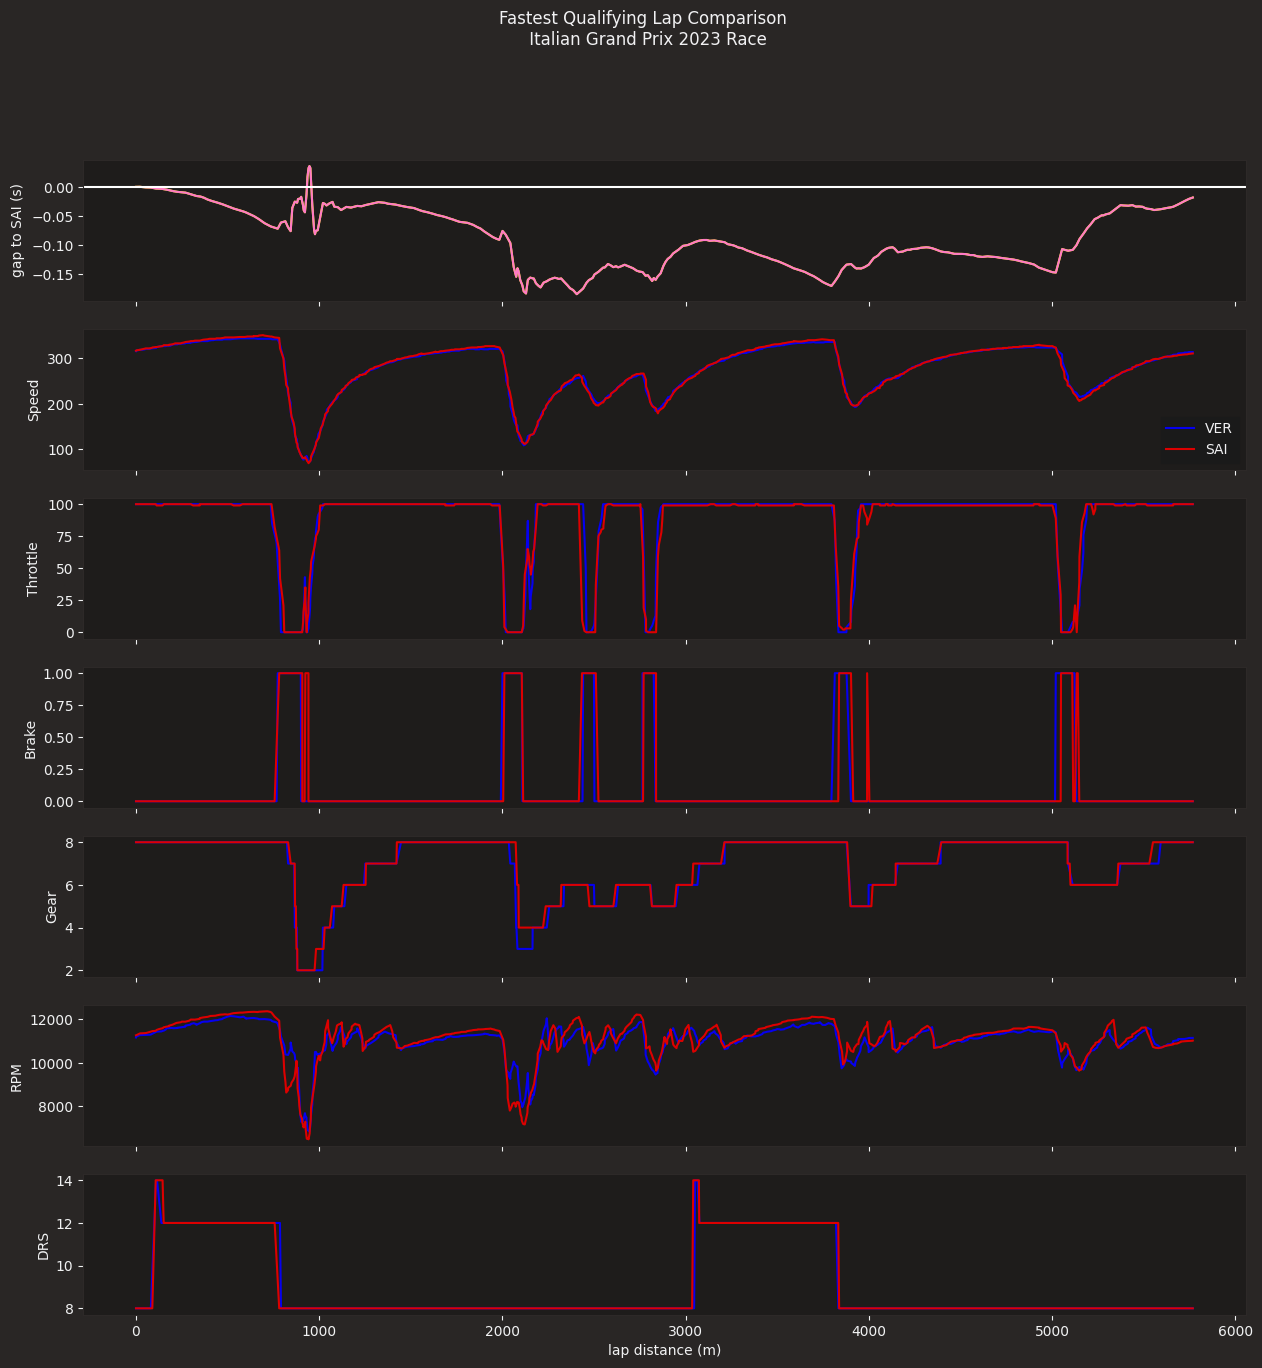

In [9]:
# get deltatime
dt, refTel, cmpTel =ff1.utils.delta_time(d1FastLap, d2FastLap,)

# define some plot variables
plot_size = [15,15]
plot_ratios = [1,3,2,1,1,2,1]

plt.rcParams["figure.figsize"] = plot_size

# start plotting
fi, ax = plt.subplots(7)

# deltatime
ax[0].plot(refTel["Distance"], dt, color="yellow")
ax[0].plot(refTel["Distance"], dt)
ax[0].axhline(0, color="white")
ax[0].set_ylabel(f"gap to {d2} (s)")

# speed
ax[1].plot(d1Tel["Distance"], d1Tel["Speed"], label=d1, color=d1Color)
ax[1].plot(d2Tel["Distance"], d2Tel["Speed"], label=d2, color=d2Color)
ax[1].set_ylabel("Speed")
ax[1].legend(loc="lower right")

# throttle
ax[2].plot(d1Tel["Distance"], d1Tel["Throttle"], label=d1, color=d1Color)
ax[2].plot(d2Tel["Distance"], d2Tel["Throttle"], label=d2, color=d2Color)
ax[2].set_ylabel("Throttle")

# brake
ax[3].plot(d1Tel["Distance"], d1Tel["Brake"], label=d1, color=d1Color)
ax[3].plot(d2Tel["Distance"], d2Tel["Brake"], label=d2, color=d2Color)
ax[3].set_ylabel("Brake")

# gear
ax[4].plot(d1Tel["Distance"], d1Tel["nGear"], label=d1, color=d1Color)
ax[4].plot(d2Tel["Distance"], d2Tel["nGear"], label=d2, color=d2Color)
ax[4].set_ylabel("Gear")

# rpm 
ax[5].plot(d1Tel["Distance"], d1Tel["RPM"], label=d1, color=d1Color)
ax[5].plot(d2Tel["Distance"], d2Tel["RPM"], label=d2, color=d2Color)
ax[5].set_ylabel("RPM")

# drs
ax[6].plot(d1Tel["Distance"], d1Tel["DRS"], label=d1, color=d1Color)
ax[6].plot(d2Tel["Distance"], d2Tel["DRS"], label=d2, color=d2Color)
ax[6].set_ylabel("DRS")
ax[6].set_xlabel("lap distance (m)")

plt.suptitle(f"Fastest Qualifying Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Race")

for a in ax.flat:
    a.label_outer()


plt.show()